# An introduction to PyTorch

PyTorch is a platform for deep learning in Python or C++. In this lecture we will focus in the **Python** landscape.

### **1. Before tensor: what is a number?**
*   x=5 is a Python int
*   Stored in Python’s object system
*   No shape, no device, no gradients
*   Python decides everything about it

### **2. What changes when you say torch.tensor(x)?**
Now 5 is wrapped into a Tensor object.

### **What a tensor actually contains :**

A tensor is NOT just a number. It is a structured object with metadata:

### **Tensor :**

*   data pointer → raw memory (C-level)
*   dtype → int64 / float32 / float16 / etc
*   shape → ()
*   device → CPU / GPU
*   stride → how to move in memory
*   requires_grad → True/False

### **3. Why PyTorch needs this structure**



*   Because PyTorch is built to:
*   Run vectorized math
*   Use C++ backend
*   Run on GPU
*   Track gradients
*   Apply broadcasting
*   Optimize memory

A Python number can’t do any of this.


# Tensors:
A tensor is a number + metadata + memory + math rules

Tensors are elementary units of PyTorch. They are very similar to numpy arrays

A random seed initializes the internal state of a random number generator (RNG). The RNG itself is a deterministic algorithm that produces a sequence of numbers based on this state. Setting the same seed ensures that the generator starts from the same initial state and therefore produces the same sequence of “random” numbers each time. The numbers are not pre-stored; they are generated on the fly, but the seed fixes where the sequence begins, which is why results become reproducible.

In [1]:
import numpy as np
np.random.seed(0)

import torch
torch.manual_seed(0)

In [2]:
x = np.array([1.0, 2.0, 3.0])
y = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [3]:
x

array([1., 2., 3.])

In [4]:
y

tensor([1., 2., 3.], requires_grad=True)

In [5]:
z = y ** 2
z

tensor([1., 4., 9.], grad_fn=<PowBackward0>)

Broadly speaking, a tensor is like a numpy array that can carry gradient information from the chain of operations applied on top of it. There are other flavors that make them different, but this is the key distinction.

## Creating tensors

In [6]:
# directly from data
data = [[0, 1], [1, 0]]
x_data = torch.tensor(data)
x_data

tensor([[0, 1],
        [1, 0]])

In [7]:
# from a numpy array
x_numpy = np.array([[1, 2], [3, 4]])
x_torch = torch.from_numpy(x_numpy)
x_torch

tensor([[1, 2],
        [3, 4]])

In [8]:
# convert it back to a numpy array
x_numpy = x_torch.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [10]:
# with constant data
x = torch.ones(2, 3)  # 2 rows and 3 columns
print(x)
y = torch.zeros(3, 2) # 3 rows and 2 columns
print(y)
z = torch.full((3, 3), -5)  # 3 row and 1 columns (aka column vector)
print(z)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[-5, -5, -5],
        [-5, -5, -5],
        [-5, -5, -5]])


### **Short difference:**


* torch.rand → samples from a uniform distribution Values are evenly spread in [0, 1)
*   torch.randn → samples from a normal (Gaussian) distribution Mean = 0, Standard deviation = 1

In [11]:
# with random data
x = torch.rand(2, 3)  # uniform distribution U(0, 1)
print(x)
y = torch.randn(2, 3)  # standard gaussian N(0, 1)
print(y)
z = torch.randint(0, 10, size=(2, 3))  # random integers [0, 10)
print(z)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341]])
tensor([[ 1.2645, -0.6874,  0.1604],
        [-0.6065, -0.7831,  1.0622]])
tensor([[4, 3, 6],
        [9, 1, 4]])


torch.arange creates a 1-D tensor of evenly spaced values, just like Python’s range, but as a tensor.

**torch.arange(start, end, step)**

torch.linspace: what it does:
Creates a 1D tensor of evenly spaced values between two endpoints (inclusive).

**torch.linspace(start, end, steps)**



In [13]:
# other initializations
print(torch.arange(5))  # from 0 (inclusive) to 5 (exclusive)
print(torch.arange(2, 8))  # from 2 to 8
print(torch.arange(2, 8, 2))  # from 2 to 8, with stepsize=2

print(torch.linspace(0, 1, 6))  # returns 6 linear spaced numbers from 0 to 1 (inclusive)
print(torch.linspace(-1, 1, 8))  # returns 8 linear spaced numbers form -1 to 1

print(torch.eye(3))  # identity matrix

tensor([0, 1, 2, 3, 4])
tensor([2, 3, 4, 5, 6, 7])
tensor([2, 4, 6])
tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000])
tensor([-1.0000, -0.7143, -0.4286, -0.1429,  0.1429,  0.4286,  0.7143,  1.0000])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


See the full set of creation ops [here](https://pytorch.org/docs/stable/torch.html#creation-ops).

## Tensor attributes

In [14]:
x = torch.rand(3, 4, requires_grad=True)
print(x.device)
print(x.shape)
print(x.dtype)
print(x)
print(x.data)
print(x[0, 0])
print(x[0, 0].item())

cpu
torch.Size([3, 4])
torch.float32
tensor([[0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320],
        [0.1759, 0.2698, 0.1507, 0.0317]], requires_grad=True)
tensor([[0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320],
        [0.1759, 0.2698, 0.1507, 0.0317]])
tensor(0.4194, grad_fn=<SelectBackward0>)
0.41940832138061523


Tensor data types:

<table class="docutils colwidths-auto align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Data type</p></th>
<th class="head"><p>dtype</p></th>
<th class="head"><p>Legacy Constructors</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>32-bit floating point</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.float32</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.float</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.FloatTensor</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>64-bit floating point</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.float64</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.double</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.DoubleTensor</span></code></p></td>
</tr>
<tr class="row-even"><td><p>64-bit complex</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.complex64</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.cfloat</span></code></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>128-bit complex</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.complex128</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.cdouble</span></code></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>16-bit floating point <a class="footnote-reference brackets" href="#id3" id="id1">1</a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.float16</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.half</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.HalfTensor</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>16-bit floating point <a class="footnote-reference brackets" href="#id4" id="id2">2</a></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.bfloat16</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.BFloat16Tensor</span></code></p></td>
</tr>
<tr class="row-even"><td><p>8-bit integer (unsigned)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.uint8</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.ByteTensor</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>8-bit integer (signed)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.int8</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.CharTensor</span></code></p></td>
</tr>
<tr class="row-even"><td><p>16-bit integer (signed)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.int16</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.short</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.ShortTensor</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>32-bit integer (signed)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.int32</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.int</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.IntTensor</span></code></p></td>
</tr>
<tr class="row-even"><td><p>64-bit integer (signed)</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.int64</span></code> or <code class="docutils literal notranslate"><span class="pre">torch.long</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.LongTensor</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Boolean</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.bool</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">torch.*.BoolTensor</span></code></p></td>
</tr>
</tbody>
</table>


Casting tensors accoding to regular Python rules:
```
complex > floating > integral > boolean
```

Also, be careful with casts to the same dtypes to avoid underflow/overflow:

In [15]:
float_tensor = torch.randn(2, 2, dtype=torch.float)
int_tensor = torch.ones(1, dtype=torch.int)
long_tensor = torch.ones(1, dtype=torch.long)
uint_tensor = torch.ones(1, dtype=torch.uint8)

In [16]:
long_tensor_big_number = long_tensor * 2**33
long_tensor_big_number, long_tensor_big_number.int()

(tensor([8589934592]), tensor([0], dtype=torch.int32))

In [17]:
float_tensor, float_tensor.long()

(tensor([[-0.8920, -1.5091],
         [ 0.3704,  1.4565]]),
 tensor([[ 0, -1],
         [ 0,  1]]))

See the full list of attributes [here](https://pytorch.org/docs/stable/tensor_attributes.html)

## Examples

### **Scalar tensors exist because:**


*   Math kernels expect tensors
*   Gradients must flow through everything
*   Broadcasting rules apply uniformly


tensor(2)
torch.Size([])
2

tensor([0.1387, 0.2422, 0.8155, 0.7932])
torch.Size([4])

tensor([[0.2783, 0.4820, 0.8198],
        [0.9971, 0.6984, 0.5675],
        [0.8352, 0.2056, 0.5932],
        [0.1123, 0.1535, 0.2417]])
torch.Size([4, 3])

tensor([[[0.7262, 0.7011, 0.2038],
         [0.6511, 0.7745, 0.4369],
         [0.5191, 0.6159, 0.8102],
         [0.9801, 0.1147, 0.3168]],

        [[0.6965, 0.9143, 0.9351],
         [0.9412, 0.5995, 0.0652],
         [0.5460, 0.1872, 0.0340],
         [0.9442, 0.8802, 0.0012]],

        [[0.5936, 0.4158, 0.4177],
         [0.2711, 0.6923, 0.2038],
         [0.6833, 0.7529, 0.8579],
         [0.6870, 0.0051, 0.1757]]])
torch.Size([3, 4, 3])



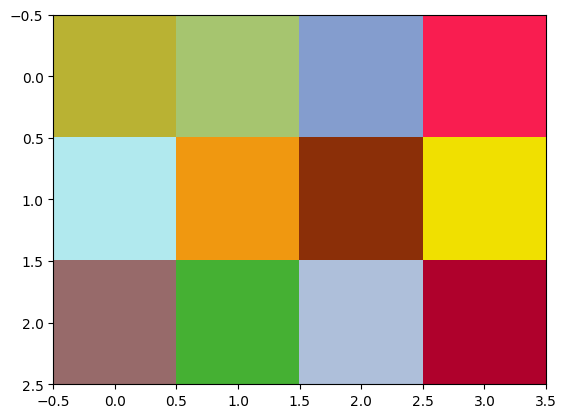

In [18]:
# scalar
x = torch.tensor(2)
print(x)
print(x.shape)
print(x.item())  # access the (single) element inside the tensor
print('')

# vector
x = torch.rand(4)
print(x)
print(x.shape)
print('')

# matrix
x = torch.rand(4, 3)
print(x)
print(x.shape)
print('')

# n-dimensional array
x = torch.rand(3, 4, 3)  # e.g., image with width=3, height=4, and channels=3
print(x)
print(x.shape)
print('')

from matplotlib import pyplot as plt; plt.imshow(x)

## Tensor operations

In [19]:
v1 = torch.arange(8)
v2 = torch.arange(10, 18)

print("v1: %s" % v1)
print("v2: %s" % v2)
print("Dot product: %d" % v1.dot(v2))

v1: tensor([0, 1, 2, 3, 4, 5, 6, 7])
v2: tensor([10, 11, 12, 13, 14, 15, 16, 17])
Dot product: 420


#### You can also change a value inside the array manually

In [20]:
v2[1] = 25
print(v2)

tensor([10, 25, 12, 13, 14, 15, 16, 17])


**Accessing values:**

Individual tensor positions are scalars, or 0-dimension tensor:

In [21]:
print(v1[0])
print(v1[0].shape)

tensor(0)
torch.Size([])


`.item()` returns a Python number:

In [25]:
number = v1[1].item()
print(number)
print(isinstance(number, int))

1
True


**Numpy-style indexing:**

In [27]:
m = torch.randn(3, 4, 3)
m

tensor([[[-0.5111, -1.7137, -0.5101],
         [-0.4749, -0.6334, -1.4677],
         [-0.8785, -2.0784, -1.1005],
         [-0.7201,  0.0119,  0.3398]],

        [[-0.2635,  1.2805,  0.0194],
         [-0.8808,  0.4386, -0.0107],
         [ 1.3384, -0.2794,  0.0747],
         [ 0.5600,  0.5314,  1.2351]],

        [[-1.4777, -1.7557,  0.0762],
         [-1.0786, -1.6034,  0.0581],
         [-0.6302,  0.7466, -0.0640],
         [ 1.0384,  0.9068, -0.4755]]])

In [28]:
m[0,1,0]

tensor(-0.4749)

In [34]:
m[:, 0, 0]

tensor([-0.5111, -0.2635, -1.4777])

In [35]:
m[:, :, 0]

tensor([[-0.5111, -0.4749, -0.8785, -0.7201],
        [-0.2635, -0.8808,  1.3384,  0.5600],
        [-1.4777, -1.0786, -0.6302,  1.0384]])

In [36]:
m[0, :, -1]

tensor([-0.5101, -1.4677, -1.1005,  0.3398])

In [37]:
m[:, :, -1]

tensor([[-0.5101, -1.4677, -1.1005,  0.3398],
        [ 0.0194, -0.0107,  0.0747,  1.2351],
        [ 0.0762,  0.0581, -0.0640, -0.4755]])

In [38]:
m[..., -1]

tensor([[-0.5101, -1.4677, -1.1005,  0.3398],
        [ 0.0194, -0.0107,  0.0747,  1.2351],
        [ 0.0762,  0.0581, -0.0640, -0.4755]])

## Elementwise operations

In [39]:
v1

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [40]:
v2

tensor([10, 25, 12, 13, 14, 15, 16, 17])

In [41]:
v1 + v2

tensor([10, 26, 14, 16, 18, 20, 22, 24])

In [42]:
v1 * v2

tensor([  0,  25,  24,  39,  56,  75,  96, 119])

Some caveats when working with integer values!

In [43]:
v1 / v2

tensor([0.0000, 0.0400, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118])

In [44]:
x = v1.float()
y = v2.float()
x / y

tensor([0.0000, 0.0400, 0.1667, 0.2308, 0.2857, 0.3333, 0.3750, 0.4118])

#### Operations with constants

In [45]:
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [46]:
x + 1

tensor([1., 2., 3., 4., 5., 6., 7., 8.])

In [47]:
x ** 2

tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49.])

## Aggregating tensors

In [48]:
(x ** 2).sum().sqrt()

tensor(11.8322)

In [49]:
x.mean(), x.std()

(tensor(3.5000), tensor(2.4495))

In [50]:
x.min(), x.max()

(tensor(0.), tensor(7.))

In [51]:
x.norm(p=3)

tensor(9.2209)

## Joining tensors

In [55]:
torch.cat([x, y])

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., 10., 25., 12., 13., 14., 15.,
        16., 17.])

In [56]:
z = torch.stack([x, y])
z

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [10., 25., 12., 13., 14., 15., 16., 17.]])

In [57]:
torch.vstack([z, x])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [10., 25., 12., 13., 14., 15., 16., 17.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]])

## Tensor multiplication

In [58]:
m1 = torch.rand(5, 4)
m2 = torch.rand(4, 5)

print("m1: %s\n" % m1)
print("m2: %s\n" % m2)
print(m1.dot(m2))

m1: tensor([[0.9135, 0.3538, 0.2032, 0.3151],
        [0.0044, 0.7257, 0.2599, 0.1663],
        [0.2119, 0.7875, 0.7648, 0.8838],
        [0.6814, 0.3330, 0.3603, 0.6477],
        [0.9110, 0.6359, 0.2634, 0.2650]])

m2: tensor([[0.0273, 0.6080, 0.2194, 0.0542, 0.9384],
        [0.1753, 0.4431, 0.6432, 0.5159, 0.1636],
        [0.0958, 0.8985, 0.5814, 0.9148, 0.3324],
        [0.6473, 0.3857, 0.4778, 0.1955, 0.6691]])



RuntimeError: 1D tensors expected, but got 2D and 2D tensors

Oops... that can be misleading if you are used to numpy. In PyTorch, `dot` is reserved for vectors only.
For matrices, call `mm`:

In [59]:
print(m1.mm(m2))

tensor([[0.3103, 1.0163, 0.6967, 0.4795, 1.1934],
        [0.2599, 0.6219, 0.6983, 0.6449, 0.3205],
        [0.7892, 1.5058, 1.4199, 1.2902, 1.1732],
        [0.5307, 1.1354, 0.8826, 0.6650, 1.2470],
        [0.3331, 1.1746, 0.8887, 0.6703, 1.2238]])


Or the now-default-python operator for matrix multiplication `@`

In [60]:
print(m1 @ m2)

tensor([[0.3103, 1.0163, 0.6967, 0.4795, 1.1934],
        [0.2599, 0.6219, 0.6983, 0.6449, 0.3205],
        [0.7892, 1.5058, 1.4199, 1.2902, 1.1732],
        [0.5307, 1.1354, 0.8826, 0.6650, 1.2470],
        [0.3331, 1.1746, 0.8887, 0.6703, 1.2238]])


What if I have batched data? It's better to use `.bmm()` (this is a common source of error)

In [61]:
m1 = torch.rand(2, 5, 4)
m2 = torch.rand(2, 4, 5)

print(m1.bmm(m2))

tensor([[[1.6479, 1.3350, 0.7367, 1.0767, 1.1947],
         [1.8707, 1.4229, 0.5979, 1.4146, 1.6020],
         [1.5422, 1.0666, 1.0070, 0.8352, 1.1446],
         [1.8081, 1.1977, 0.7815, 1.2510, 1.6343],
         [1.5428, 1.1293, 0.7857, 0.8768, 1.1978]],

        [[0.6249, 1.2653, 1.4720, 1.3460, 1.5514],
         [0.5720, 0.9601, 1.2208, 1.0314, 1.1755],
         [0.6798, 0.6424, 0.9722, 0.6752, 0.7358],
         [1.1625, 1.5315, 1.9303, 1.6256, 1.4810],
         [0.5039, 0.6360, 0.6846, 0.6596, 0.3803]]])


`@` will work as `.bmm()`!

In [62]:
print(m1 @ m2)

tensor([[[1.6479, 1.3350, 0.7367, 1.0767, 1.1947],
         [1.8707, 1.4229, 0.5979, 1.4146, 1.6020],
         [1.5422, 1.0666, 1.0070, 0.8352, 1.1446],
         [1.8081, 1.1977, 0.7815, 1.2510, 1.6343],
         [1.5428, 1.1293, 0.7857, 0.8768, 1.1978]],

        [[0.6249, 1.2653, 1.4720, 1.3460, 1.5514],
         [0.5720, 0.9601, 1.2208, 1.0314, 1.1755],
         [0.6798, 0.6424, 0.9722, 0.6752, 0.7358],
         [1.1625, 1.5315, 1.9303, 1.6256, 1.4810],
         [0.5039, 0.6360, 0.6846, 0.6596, 0.3803]]])


What if I have even more dimensions?

In [63]:
m1 = torch.rand(2, 3, 5, 4)
m2 = torch.rand(2, 3, 4, 5)

print(m1.bmm(m2))

RuntimeError: batch1 must be a 3D tensor

`.bmm` works only with 3d tensors. For higher dimensionalities, we can use the more general `matmul`. In fact, the `@` operator is a shorthand for `matmul` (which is implemented in the magic method `__matmul__` )

In [64]:
print(m1.matmul(m2).shape)
print(m1.matmul(m2))

torch.Size([2, 3, 5, 5])
tensor([[[[0.3150, 0.3492, 0.5172, 0.1447, 0.4142],
          [2.1584, 1.9884, 3.0919, 0.9529, 2.1306],
          [1.9984, 1.3981, 2.5204, 0.9374, 1.6324],
          [1.8683, 1.9319, 2.8112, 0.7972, 2.0620],
          [1.0994, 1.3237, 1.7758, 0.4362, 1.3319]],

         [[0.5815, 0.6743, 0.4745, 1.1542, 1.0755],
          [1.0164, 1.0893, 1.0068, 1.8060, 1.4651],
          [1.1174, 1.1961, 1.0566, 1.9293, 1.6150],
          [1.3023, 0.8895, 0.9234, 1.6756, 2.0342],
          [0.8397, 0.9565, 0.7037, 1.1991, 1.0015]],

         [[0.4341, 0.3973, 0.8344, 0.7263, 0.6930],
          [0.8291, 0.6088, 1.5489, 0.8014, 0.4908],
          [0.6874, 0.4801, 1.2092, 0.8056, 0.4135],
          [0.3248, 0.2309, 0.4768, 0.7598, 0.3741],
          [0.5674, 0.4991, 1.2009, 0.4547, 0.5599]]],


        [[[1.3111, 1.0169, 1.1004, 0.8878, 0.7920],
          [0.9164, 0.8126, 0.5919, 1.0495, 0.5920],
          [0.4991, 1.0604, 0.7175, 1.1689, 0.8254],
          [0.7462, 1.5556, 1.03

Anoter option is to use the powerful `einsum` function. Let's say our input have the following representation:
- `b` = batch size
- `c` = channels
- `i` = `m1` timesteps
- `j` = `m2` timesteps
- `d` = hidden size

In [65]:
torch.einsum('bcid,bcdj->bcij', m1, m2)

tensor([[[[0.3150, 0.3492, 0.5172, 0.1447, 0.4142],
          [2.1584, 1.9884, 3.0919, 0.9529, 2.1306],
          [1.9984, 1.3981, 2.5204, 0.9374, 1.6324],
          [1.8683, 1.9319, 2.8112, 0.7972, 2.0620],
          [1.0994, 1.3237, 1.7758, 0.4362, 1.3319]],

         [[0.5815, 0.6743, 0.4745, 1.1542, 1.0755],
          [1.0164, 1.0893, 1.0068, 1.8060, 1.4651],
          [1.1174, 1.1961, 1.0566, 1.9293, 1.6150],
          [1.3023, 0.8895, 0.9234, 1.6756, 2.0342],
          [0.8397, 0.9565, 0.7037, 1.1991, 1.0015]],

         [[0.4341, 0.3973, 0.8344, 0.7263, 0.6930],
          [0.8291, 0.6088, 1.5489, 0.8014, 0.4908],
          [0.6874, 0.4801, 1.2092, 0.8056, 0.4135],
          [0.3248, 0.2309, 0.4768, 0.7598, 0.3741],
          [0.5674, 0.4991, 1.2009, 0.4547, 0.5599]]],


        [[[1.3111, 1.0169, 1.1004, 0.8878, 0.7920],
          [0.9164, 0.8126, 0.5919, 1.0495, 0.5920],
          [0.4991, 1.0604, 0.7175, 1.1689, 0.8254],
          [0.7462, 1.5556, 1.0342, 0.9131, 0.8249],
    

See more about `einsum` here: https://pytorch.org/docs/master/generated/torch.einsum.html#torch.einsum

## Broadcasting

Broadcasting aligns shapes from the RIGHT.
A dimension is expandable ONLY if its size is 1.

Broadcasting means doing some arithmetic operation with tensors of different ranks, as if the smaller one were expanded, or broadcast, to match the larger.

Let's experiment with a matrix (rank 2 tensor) and a vector (rank 1).

In [66]:
m = torch.rand(5, 4)
v = torch.arange(4)

In [67]:
print("m:", m)
print("v:", v)

m: tensor([[0.9168, 0.2794, 0.6774, 0.9349],
        [0.7522, 0.5708, 0.9254, 0.5672],
        [0.2687, 0.9730, 0.6183, 0.0122],
        [0.3577, 0.1594, 0.9384, 0.4174],
        [0.0442, 0.4686, 0.8140, 0.6299]])
v: tensor([0, 1, 2, 3])


In [68]:
m_plus_v = m + v
print("m + v:\n", m_plus_v)

m + v:
 tensor([[0.9168, 1.2794, 2.6774, 3.9349],
        [0.7522, 1.5708, 2.9254, 3.5672],
        [0.2687, 1.9730, 2.6183, 3.0122],
        [0.3577, 1.1594, 2.9384, 3.4174],
        [0.0442, 1.4686, 2.8140, 3.6299]])


Proof check

In [69]:
print("m[0] = %s\n" % m[0])
print("v = %s\n" % v)

row_sum = m[0] + v
print("m[0] + v = %s\n" % row_sum)
print("(m + v)[0] = %s" % m_plus_v[0])

m[0] = tensor([0.9168, 0.2794, 0.6774, 0.9349])

v = tensor([0, 1, 2, 3])

m[0] + v = tensor([0.9168, 1.2794, 2.6774, 3.9349])

(m + v)[0] = tensor([0.9168, 1.2794, 2.6774, 3.9349])


We can also reshape tensors

In [70]:
v.shape

torch.Size([4])

In [71]:
v

tensor([0, 1, 2, 3])

In [72]:
v = v.view(2, 2)
v

tensor([[0, 1],
        [2, 3]])

In [73]:
v = v.view(4, 1)
v

tensor([[0],
        [1],
        [2],
        [3]])

Note that shape `[4, 1]` is not broadcastable to match `[5, 4]`!

In [74]:
m + v

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 0

... but `[1, 4]` is!

In [75]:
v = v.view(1, 4)
m + v

tensor([[0.9168, 1.2794, 2.6774, 3.9349],
        [0.7522, 1.5708, 2.9254, 3.5672],
        [0.2687, 1.9730, 2.6183, 3.0122],
        [0.3577, 1.1594, 2.9384, 3.4174],
        [0.0442, 1.4686, 2.8140, 3.6299]])

## Squeezing and Unsqueezing

Broadcasting is one of the most important concepts for manipulating n-dimensional arrays. PyTorch offers some ways of expanding the rank of a tensor.

In [76]:
v = torch.rand(4).view(1, 4, 1)
print(v)
print(v.shape)

tensor([[[0.6581],
         [0.5464],
         [0.6864],
         [0.3782]]])
torch.Size([1, 4, 1])


In [77]:
v.squeeze().shape  # "compress" all single-dimensions

torch.Size([4])

In [78]:
v.squeeze(0).shape  # "compress" only the (0-indexed) single-dimension

torch.Size([4, 1])

In [79]:
v.unsqueeze(1).shape  # "add" a new dimension BEFORE the (1-indexed) dimension

torch.Size([1, 1, 4, 1])

In [80]:
# using numpy notation (better since it explicitily says where a new dimension is being created)
v[:, None].shape

torch.Size([1, 1, 4, 1])

In [81]:
v.unsqueeze(1).unsqueeze(-1).unsqueeze(1).shape  # what unsqueeze(1).unsqueeze(1) does?

torch.Size([1, 1, 1, 4, 1, 1])

In [82]:
v[:, None, None, ..., None].shape

torch.Size([1, 1, 1, 4, 1, 1])

In [83]:
# we can also use .view(dims) as long te specified dims are valid
v.view(1, 1, 1, 4, 1, 1).shape

torch.Size([1, 1, 1, 4, 1, 1])

## General Broadcast Semantics

Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [84]:
x = torch.rand(5,7,3)
y = torch.rand(5,7,3)
z = x + y
# same shapes are always broadcastable (i.e. the above rules always hold)

In [85]:
x = torch.rand((0,))
y = torch.rand(2,2)
print(x.shape)
z = x + y
# x and y are not broadcastable, because x does not have at least 1 dimension

torch.Size([0])


RuntimeError: The size of tensor a (0) must match the size of tensor b (2) at non-singleton dimension 1

In [86]:
# can line up trailing dimensions
x = torch.empty(5,3,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are broadcastable.
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dimension doesn't exist

In [89]:
# but:
x = torch.empty(5,2,4,1)
y = torch.empty(  3,1,1)
z = x + y
# x and y are not broadcastable, because in the 3rd trailing dimension 2 != 3

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

Always take care of tensor shapes! It is a good practice to debug how some expression is evaluated before inserting adding it to your codebase.

<!-- In other words, **you can use pytorch's dynamic graph creation ability to debug your model by printing tensor shapes!** -->

See more here: https://pytorch.org/docs/master/notes/broadcasting.html

## Useful Functions

Pytorch (and other libraries) have many functions that operate on tensors. Let's try some of them and plot the results.

In [90]:
import matplotlib.pyplot as plt

Create a vector x with values from -10 to 10, and intervals of 0.1.

In [91]:
x = torch.arange(-10, 10, 0.1, dtype=torch.float)

In [92]:
x.shape

torch.Size([200])

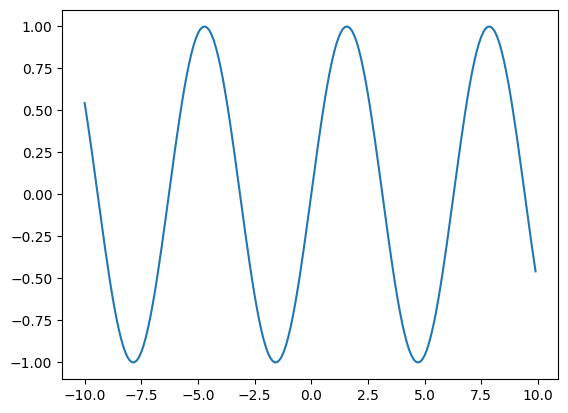

In [93]:
y = x.sin()
plt.plot(x.numpy(), y.numpy())

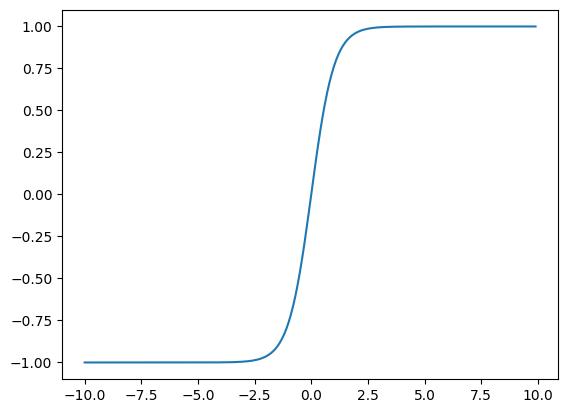

In [94]:
y = x.tanh()
plt.plot(x.numpy(), y.numpy())

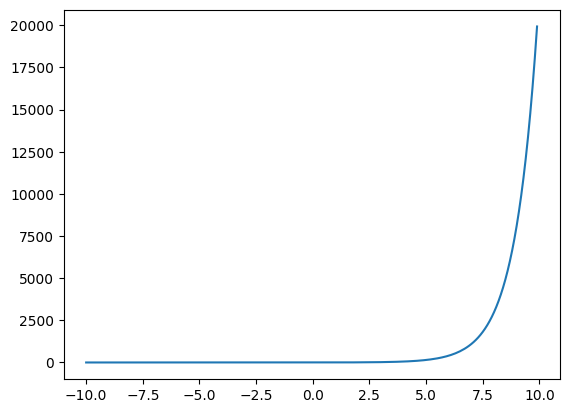

In [95]:
y = x.exp()
plt.plot(x.numpy(), y.numpy())

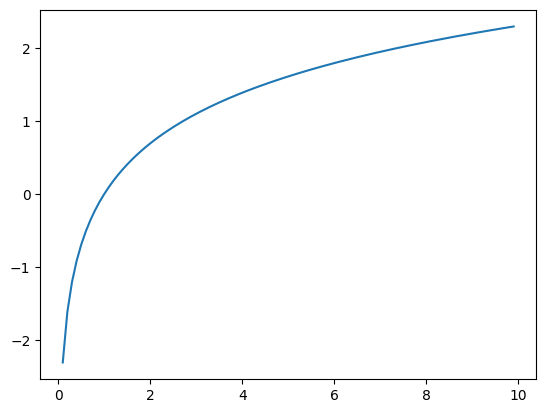

In [97]:
y = torch.log(x)
plt.plot(x.numpy(), y.numpy())

# But what about GPUs?
How do I use A GPU?

In [98]:
my_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_device

device(type='cpu')

If you have a GPU you should get something like:
`device(type='cuda', index=0)`

In [99]:
# you can initialize a tensor in a specfic device
torch.ones(5, device=my_device)

tensor([1., 1., 1., 1., 1.])

In [100]:
# you can move data to the GPU by doing .to(device)
data = torch.eye(3)  # data is on the cpu
data.to(my_device)  # data is moved to my_device

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Now the computation happens on the GPU.

In [101]:
res = data + data
res

tensor([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]])

In [102]:
# you can get a tensor's device via the .device attribute
res.device
z = torch.arange(10)
z = z.to(res.device)
print(z.device)

cpu


# Automatic differentiation with `autograd`

Central to all neural networks in PyTorch is the `autograd` package.

We can say that it is the _true_ power behind PyTorch. The autograd package provides automatic differentiation for all operations on Tensors. It is a **define-by-run** framework, which means that your backprop is defined by how your code is run, and that **every single iteration can be different**.

`torch.Tensor` is the central class of the package. If you set its attribute `.requires_grad` as `True`, it starts to track all operations applied on it. When you finish your computation you can call `.backward()` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into the `.grad` attribute.

In [103]:
x = torch.tensor(2.)
print(x)

tensor(2.)


In [104]:
# setting requires_grad in directly via tensor's constructor
x = torch.tensor(2., requires_grad=True)

# or by setting .requires_grad attribute
# you can do this at any moment to track operations on x
x.requires_grad = True

print(x)

tensor(2., requires_grad=True)


In [105]:
print(x.requires_grad)
print(x.grad)  # no gradient yet

True
None


In [106]:
# let's perform a simple operation on x
y = x ** 2

print("Grad of x:", x.grad)

Grad of x: None


In [107]:
# if you want to compute the derivatives, you can call .backward() on a Tensor
y.backward()
print("Grad of y with respect to x:", x.grad)

Grad of y with respect to x: tensor(4.)


To stop a tensor from tracking history, you can call `.detach()` to detach it from the computation history, and to prevent future computation from being tracked.

In [108]:
x = torch.tensor(2., requires_grad=True)
print(x)

y = x ** 2
print(y)

c = y.detach()  # c will be treated as a constant! c has the same contents as y but requires_grad=False
print(c)

z = c * y.exp()
print(z)

z.backward()
print(x.grad)

tensor(2., requires_grad=True)
tensor(4., grad_fn=<PowBackward0>)
tensor(4.)
tensor(218.3926, grad_fn=<MulBackward0>)
tensor(873.5704)


To prevent tracking history (and using memory), you can also wrap the code block in with `torch.no_grad()`: This can be particularly helpful when evaluating a model because the model may have trainable parameters with `requires_grad=True`, but for which we don’t need the gradients.

In [109]:
x = torch.tensor(2.)
x.requires_grad = True
print('x:', x)

y = x ** 2
print('y:', y)

with torch.no_grad():
    y = 2 * y
    print('x:', x)  # Try to think why x.requires_grad is True
    print('y:', y)

x: tensor(2., requires_grad=True)
y: tensor(4., grad_fn=<PowBackward0>)
x: tensor(2., requires_grad=True)
y: tensor(8.)


There’s one more class which is very important for autograd implementation - a `Function`.

`Tensor` and `Function` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a `.grad_fn` attribute that references a `Function` that has created the `Tensor` (except for `Tensor`s created by the user - their `grad_fn` is `None`).

Let's go back and see the `grad_fn` in our previous example:
```
input -> x -> Pow(2) -> y -> Exp() -> Mul(constant) -> output
```

We can create a `Function` and manually define its gradient (this is particularly useful for originally non-differentiable operations)

In [110]:
class Exp(torch.autograd.Function):
    @staticmethod
    def forward(ctx, i):
        result = i.exp()
        ctx.save_for_backward(result)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        result, = ctx.saved_tensors
        return grad_output * result

# Use it by calling the apply method:
x = torch.arange(4)
output = Exp.apply(x)
output

tensor([ 1.0000,  2.7183,  7.3891, 20.0855])

If you still don't believe autograd works, here's something that I think will change your mind --- we're going to compute the derivative of an unnecessarily complicated function:

$$ y(x) = \sum_{x_i} e^{0.001 x_i^2} + \sin(x_i^3) \cdot \log(x_i)$$

In [111]:
def complicated_func(X):
    return torch.sum(torch.exp(0.001 * X ** 2) + torch.sin(X ** 3) * torch.log(X))

In [112]:
x = torch.arange(1, 10, 0.1, dtype=torch.float, requires_grad=True)
x

tensor([1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000, 1.8000,
        1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000, 2.7000,
        2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000, 3.6000,
        3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000, 4.5000,
        4.6000, 4.7000, 4.8000, 4.9000, 5.0000, 5.1000, 5.2000, 5.3000, 5.4000,
        5.5000, 5.6000, 5.7000, 5.8000, 5.9000, 6.0000, 6.1000, 6.2000, 6.3000,
        6.4000, 6.5000, 6.6000, 6.7000, 6.8000, 6.9000, 7.0000, 7.1000, 7.2000,
        7.3000, 7.4000, 7.5000, 7.6000, 7.7000, 7.8000, 7.9000, 8.0000, 8.1000,
        8.2000, 8.3000, 8.4000, 8.5000, 8.6000, 8.7000, 8.8000, 8.9000, 9.0000,
        9.1000, 9.2000, 9.3000, 9.4000, 9.5000, 9.6000, 9.7000, 9.8000, 9.9000],
       requires_grad=True)

In [113]:
y = complicated_func(x)
y.backward()

In [114]:
x.grad

tensor([ 8.4347e-01,  9.6745e-01,  7.0215e-01, -1.5371e-01, -1.5448e+00,
        -2.8139e+00, -2.5935e+00,  3.4371e-01,  4.9029e+00,  6.1208e+00,
        -7.1154e-01, -9.6026e+00, -4.3225e+00,  1.2014e+01,  5.0618e+00,
        -1.7083e+01,  5.3129e+00,  1.4884e+01, -2.4178e+01,  1.9542e+01,
        -8.3407e+00, -2.0807e+00,  8.0650e+00, -7.7079e+00, -1.1458e+00,
         2.0335e+01, -4.4318e+01,  4.9858e+01, -6.3648e+00, -5.7770e+01,
         2.6313e+01,  6.9782e+01,  1.9344e+01, -4.6109e+01, -8.0577e+01,
        -9.1352e+01, -9.6715e+01, -1.0142e+02, -8.7322e+01, -1.8514e+01,
         9.4970e+01,  9.7035e+01, -9.6455e+01, -4.8176e+01,  1.3684e+02,
        -1.5338e+02,  1.5415e+02, -1.6741e+02,  1.6771e+02, -7.1524e+01,
        -1.3881e+02,  1.4273e+02,  1.9093e+02,  6.2615e+01, -4.0747e+01,
        -6.2126e+01,  9.7839e+00,  1.7279e+02,  2.5614e+02, -5.8047e+01,
        -2.4144e+02,  2.8856e+02, -2.5302e+02,  2.7244e+02, -3.2850e+02,
         2.1105e+02,  2.3265e+02, -1.9561e+02, -3.6

### Concepts not covered in this lecture

PyTorch's `autograd` is a very powerfull tool. For instance, it can calculate the Jacobian and Hessian of any given function! Here is a list of more advanced things that you can accomplish with `autograd`:

- Vector-Jacobian products for non-scalar outputs (e.g., when `y` is a vector)
- Compute Jacobian and Hessian
- Retain the computation graph (useful for inspecting gradients inside a model)
- Sparse gradients
- Register and remove hooks (useful for saving gradients)
- How to set up user-designed `Function`s properly
- Numerical gradient checking


More info: https://pytorch.org/docs/stable/autograd.html

### The interaction of `autograd` with `nn.Module`s and `nn.Parameters`

In the next notebook we will see how to build a linear regression model using PyTorch's `nn.Module`. You will see that you don't need to worry about gradients when using `nn.Module` and `nn.Parameter`. This is because they automatically keep track of gradients for you.

In [115]:
# w.x + b
lin = torch.nn.Linear(2, 1, bias=True)  # nn.Linear is a nn.Module
lin.weight  # lin.weight is a nn.Parameter!

Parameter containing:
tensor([[0.0257, 0.4896]], requires_grad=True)

In [116]:
type(lin.weight)

torch.nn.parameter.Parameter

---